In [33]:
from __future__ import division
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from pyod.models.knn import KNN 
from pyod.models.lof import LOF
from pyod.models.pca import PCA
from pyod.models.iforest import IForest
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.utils import column_or_1d
from pyod.utils.utility import precision_n_scores
from sklearn.utils import check_consistent_length
import time

timekeeping = time.time()

In [2]:
path="./第四次大作业/wine/benchmarks"
file_list=[]

In [19]:
for _ in os.listdir(path):
    file_list.append(path + '/'+ _)
    
columns = [ 'diff.score','ground.truth', 'fixed.acidity', 'volatile.acidity', 'citric.acid','residual.sugar', 'chlorides', 'free.sulfur.dioxide','total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [20]:
knn_roc = []
knn_prn = []
lof_roc = []
lof_prn = []
pca_roc = []
pca_prn = []
iforest_roc = []
iforest_prn = []

In [23]:
for file in file_list:
    print(file)
    data = pd.read_csv(file, index_col=0)
    data_len = len(data)
    class_mapping = {"anomaly":1, "nominal":0}
    data['ground.truth'] = data['ground.truth'].map(class_mapping)
    y = data['ground.truth']
    x = data[columns]
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=28)
#KNN异常值检测方法
    clf_name = 'KNN'
    clf = KNN()  
    clf.fit(X_train)   
    y_train_pred = clf.labels_   
    y_train_scores = clf.decision_scores_   
    print("On train Data:")
    evaluate_print(clf_name, y_train, y_train_scores)

    y_test_pred = clf.predict(X_test)   
    y_test_scores = clf.decision_function(X_test) 
    print("On Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    y_true = column_or_1d(y_test)
    y_pred = column_or_1d(y_test_scores)
    check_consistent_length(y_true, y_pred)

    roc = np.round(roc_auc_score(y_true, y_pred), decimals=4),
    prn = np.round(precision_n_scores(y_true, y_pred), decimals=4)
    knn_roc.append(roc)
    knn_prn.append(prn)

#LOF异常值检测方法
    clf_name = 'LOF'
    clf = LOF()  
    clf.fit(X_train)   

    y_train_pred = clf.labels_  
    y_train_scores = clf.decision_scores_  
    print("On train Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
 
    y_test_pred = clf.predict(X_test)   
    y_test_scores = clf.decision_function(X_test)  
    print("On Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    y_true = column_or_1d(y_test)
    y_pred = column_or_1d(y_test_scores)
    check_consistent_length(y_true, y_pred)

    roc = np.round(roc_auc_score(y_true, y_pred), decimals=4),
    prn = np.round(precision_n_scores(y_true, y_pred), decimals=4)
    lof_roc.append(roc)
    lof_prn.append(prn)
#PCA异常值检测方法
    clf_name = 'PCA'
    clf = PCA()  
    clf.fit(X_train)   
    y_train_pred = clf.labels_   
    y_train_scores = clf.decision_scores_   
    print("On train Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
 
    y_test_pred = clf.predict(X_test)   
    y_test_scores = clf.decision_function(X_test)  
    print("On Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    y_true = column_or_1d(y_test)
    y_pred = column_or_1d(y_test_scores)
    check_consistent_length(y_true, y_pred)

    roc = np.round(roc_auc_score(y_true, y_pred), decimals=4),
    prn = np.round(precision_n_scores(y_true, y_pred), decimals=4)
    pca_roc.append(roc)
    pca_prn.append(prn)
#IForest异常值检测方法
    clf_name = 'IForest'
    clf = IForest()  
    clf.fit(X_train)  
 
    y_train_pred = clf.labels_  
    y_train_scores = clf.decision_scores_   
    print("On train Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
 
    y_test_pred = clf.predict(X_test)   
    y_test_scores = clf.decision_function(X_test)  
    print("On Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    y_true = column_or_1d(y_test)
    y_pred = column_or_1d(y_test_scores)
    check_consistent_length(y_true, y_pred)

    roc = np.round(roc_auc_score(y_true, y_pred), decimals=4),
    prn = np.round(precision_n_scores(y_true, y_pred), decimals=4)
    iforest_roc.append(roc)
    iforest_prn.append(prn)   
        

./第四次大作业/wine/benchmarks/wine_benchmark_0001.csv
On train Data:
KNN ROC:0.6161, precision @ rank n:0.4563
On Test Data:
KNN ROC:0.618, precision @ rank n:0.4613
On train Data:
LOF ROC:0.5664, precision @ rank n:0.4205
On Test Data:
LOF ROC:0.565, precision @ rank n:0.4391
On train Data:
PCA ROC:0.6381, precision @ rank n:0.4779
On Test Data:
PCA ROC:0.63, precision @ rank n:0.5018
On train Data:
IForest ROC:0.709, precision @ rank n:0.5334
On Test Data:
IForest ROC:0.6966, precision @ rank n:0.5351
./第四次大作业/wine/benchmarks/wine_benchmark_0002.csv
On train Data:
KNN ROC:0.6225, precision @ rank n:0.4552
On Test Data:
KNN ROC:0.6242, precision @ rank n:0.4886
On train Data:
LOF ROC:0.5825, precision @ rank n:0.4211
On Test Data:
LOF ROC:0.5889, precision @ rank n:0.4528
On train Data:
PCA ROC:0.6291, precision @ rank n:0.4561
On Test Data:
PCA ROC:0.6515, precision @ rank n:0.4792
On train Data:
IForest ROC:0.7495, precision @ rank n:0.539
On Test Data:
IForest ROC:0.765, precision @ ran

On Test Data:
KNN ROC:0.6032, precision @ rank n:0.4335
On train Data:
LOF ROC:0.5811, precision @ rank n:0.4206
On Test Data:
LOF ROC:0.531, precision @ rank n:0.3939
On train Data:
PCA ROC:0.638, precision @ rank n:0.465
On Test Data:
PCA ROC:0.6485, precision @ rank n:0.4848
On train Data:
IForest ROC:0.6928, precision @ rank n:0.4991
On Test Data:
IForest ROC:0.6955, precision @ rank n:0.5076
./第四次大作业/wine/benchmarks/wine_benchmark_0018.csv
On train Data:
KNN ROC:0.6374, precision @ rank n:0.461
On Test Data:
KNN ROC:0.6721, precision @ rank n:0.4863
On train Data:
LOF ROC:0.5795, precision @ rank n:0.42
On Test Data:
LOF ROC:0.5947, precision @ rank n:0.4235
On train Data:
PCA ROC:0.6477, precision @ rank n:0.4724
On Test Data:
PCA ROC:0.6737, precision @ rank n:0.5059
On train Data:
IForest ROC:0.7339, precision @ rank n:0.5324
On Test Data:
IForest ROC:0.7451, precision @ rank n:0.5647
./第四次大作业/wine/benchmarks/wine_benchmark_0019.csv
On train Data:
KNN ROC:0.6042, precision @ ra

On train Data:
IForest ROC:0.6872, precision @ rank n:0.5188
On Test Data:
IForest ROC:0.7107, precision @ rank n:0.5451
./第四次大作业/wine/benchmarks/wine_benchmark_0034.csv
On train Data:
KNN ROC:0.6092, precision @ rank n:0.4703
On Test Data:
KNN ROC:0.6037, precision @ rank n:0.4601
On train Data:
LOF ROC:0.5685, precision @ rank n:0.4251
On Test Data:
LOF ROC:0.5701, precision @ rank n:0.4183
On train Data:
PCA ROC:0.6303, precision @ rank n:0.4693
On Test Data:
PCA ROC:0.6209, precision @ rank n:0.4525
On train Data:
IForest ROC:0.7494, precision @ rank n:0.5669
On Test Data:
IForest ROC:0.7613, precision @ rank n:0.5703
./第四次大作业/wine/benchmarks/wine_benchmark_0035.csv
On train Data:
KNN ROC:0.6186, precision @ rank n:0.4503
On Test Data:
KNN ROC:0.6545, precision @ rank n:0.5103
On train Data:
LOF ROC:0.5729, precision @ rank n:0.4142
On Test Data:
LOF ROC:0.6126, precision @ rank n:0.5
On train Data:
PCA ROC:0.6388, precision @ rank n:0.4721
On Test Data:
PCA ROC:0.6117, precision @

On train Data:
KNN ROC:0.5799, precision @ rank n:0.4518
On Test Data:
KNN ROC:0.5856, precision @ rank n:0.4232
On train Data:
LOF ROC:0.5598, precision @ rank n:0.4368
On Test Data:
LOF ROC:0.5674, precision @ rank n:0.4345
On train Data:
PCA ROC:0.5968, precision @ rank n:0.4536
On Test Data:
PCA ROC:0.5963, precision @ rank n:0.4607
On train Data:
IForest ROC:0.6599, precision @ rank n:0.495
On Test Data:
IForest ROC:0.6611, precision @ rank n:0.5019
./第四次大作业/wine/benchmarks/wine_benchmark_0051.csv
On train Data:
KNN ROC:0.5949, precision @ rank n:0.4368
On Test Data:
KNN ROC:0.622, precision @ rank n:0.4552
On train Data:
LOF ROC:0.5525, precision @ rank n:0.4084
On Test Data:
LOF ROC:0.5576, precision @ rank n:0.3993
On train Data:
PCA ROC:0.6175, precision @ rank n:0.4501
On Test Data:
PCA ROC:0.6259, precision @ rank n:0.4776
On train Data:
IForest ROC:0.7284, precision @ rank n:0.5366
On Test Data:
IForest ROC:0.7365, precision @ rank n:0.5597
./第四次大作业/wine/benchmarks/wine_ben

On train Data:
LOF ROC:0.5605, precision @ rank n:0.431
On Test Data:
LOF ROC:0.57, precision @ rank n:0.417
On train Data:
PCA ROC:0.6231, precision @ rank n:0.4755
On Test Data:
PCA ROC:0.6152, precision @ rank n:0.4517
On train Data:
IForest ROC:0.7015, precision @ rank n:0.5263
On Test Data:
IForest ROC:0.701, precision @ rank n:0.5328
./第四次大作业/wine/benchmarks/wine_benchmark_0067.csv
On train Data:
KNN ROC:0.6038, precision @ rank n:0.4739
On Test Data:
KNN ROC:0.6224, precision @ rank n:0.4621
On train Data:
LOF ROC:0.5531, precision @ rank n:0.4413
On Test Data:
LOF ROC:0.5647, precision @ rank n:0.4015
On train Data:
PCA ROC:0.6226, precision @ rank n:0.4909
On Test Data:
PCA ROC:0.624, precision @ rank n:0.4583
On train Data:
IForest ROC:0.6874, precision @ rank n:0.5257
On Test Data:
IForest ROC:0.6988, precision @ rank n:0.5114
./第四次大作业/wine/benchmarks/wine_benchmark_0068.csv
On train Data:
KNN ROC:0.6065, precision @ rank n:0.4686
On Test Data:
KNN ROC:0.5852, precision @ ra

On train Data:
IForest ROC:0.6585, precision @ rank n:0.4946
On Test Data:
IForest ROC:0.6814, precision @ rank n:0.5
./第四次大作业/wine/benchmarks/wine_benchmark_0083.csv
On train Data:
KNN ROC:0.6106, precision @ rank n:0.4764
On Test Data:
KNN ROC:0.6013, precision @ rank n:0.428
On train Data:
LOF ROC:0.5651, precision @ rank n:0.4306
On Test Data:
LOF ROC:0.5445, precision @ rank n:0.376
On train Data:
PCA ROC:0.6178, precision @ rank n:0.4774
On Test Data:
PCA ROC:0.6307, precision @ rank n:0.452
On train Data:
IForest ROC:0.7283, precision @ rank n:0.5607
On Test Data:
IForest ROC:0.739, precision @ rank n:0.544
./第四次大作业/wine/benchmarks/wine_benchmark_0084.csv
On train Data:
KNN ROC:0.5891, precision @ rank n:0.4372
On Test Data:
KNN ROC:0.5891, precision @ rank n:0.4488
On train Data:
LOF ROC:0.5714, precision @ rank n:0.4262
On Test Data:
LOF ROC:0.565, precision @ rank n:0.4417
On train Data:
PCA ROC:0.6284, precision @ rank n:0.4844
On Test Data:
PCA ROC:0.6441, precision @ rank 

On train Data:
KNN ROC:0.6136, precision @ rank n:0.446
On Test Data:
KNN ROC:0.6236, precision @ rank n:0.4624
On train Data:
LOF ROC:0.5698, precision @ rank n:0.4129
On Test Data:
LOF ROC:0.5734, precision @ rank n:0.4361
On train Data:
PCA ROC:0.6424, precision @ rank n:0.4776
On Test Data:
PCA ROC:0.6734, precision @ rank n:0.515
On train Data:
IForest ROC:0.7081, precision @ rank n:0.5063
On Test Data:
IForest ROC:0.743, precision @ rank n:0.5526
./第四次大作业/wine/benchmarks/wine_benchmark_0100.csv
On train Data:
KNN ROC:0.6071, precision @ rank n:0.4613
On Test Data:
KNN ROC:0.6361, precision @ rank n:0.4344
On train Data:
LOF ROC:0.5506, precision @ rank n:0.411
On Test Data:
LOF ROC:0.5779, precision @ rank n:0.3934
On train Data:
PCA ROC:0.6472, precision @ rank n:0.4902
On Test Data:
PCA ROC:0.6539, precision @ rank n:0.4672
On train Data:
IForest ROC:0.734, precision @ rank n:0.5424
On Test Data:
IForest ROC:0.7417, precision @ rank n:0.5082
./第四次大作业/wine/benchmarks/wine_benchm

On train Data:
LOF ROC:0.5624, precision @ rank n:0.4258
On Test Data:
LOF ROC:0.5693, precision @ rank n:0.4054
On train Data:
PCA ROC:0.616, precision @ rank n:0.4691
On Test Data:
PCA ROC:0.6198, precision @ rank n:0.444
On train Data:
IForest ROC:0.7286, precision @ rank n:0.5502
On Test Data:
IForest ROC:0.7317, precision @ rank n:0.5367
./第四次大作业/wine/benchmarks/wine_benchmark_0116.csv
On train Data:
KNN ROC:0.5833, precision @ rank n:0.4521
On Test Data:
KNN ROC:0.5885, precision @ rank n:0.4356
On train Data:
LOF ROC:0.5415, precision @ rank n:0.4073
On Test Data:
LOF ROC:0.5856, precision @ rank n:0.4356
On train Data:
PCA ROC:0.6252, precision @ rank n:0.4776
On Test Data:
PCA ROC:0.5852, precision @ rank n:0.3939
On train Data:
IForest ROC:0.6922, precision @ rank n:0.5215
On Test Data:
IForest ROC:0.6607, precision @ rank n:0.4659
./第四次大作业/wine/benchmarks/wine_benchmark_0117.csv
On train Data:
KNN ROC:0.5761, precision @ rank n:0.4482
On Test Data:
KNN ROC:0.5608, precision 

On train Data:
IForest ROC:0.7277, precision @ rank n:0.5452
On Test Data:
IForest ROC:0.7727, precision @ rank n:0.6182
./第四次大作业/wine/benchmarks/wine_benchmark_0132.csv
On train Data:
KNN ROC:0.615, precision @ rank n:0.4476
On Test Data:
KNN ROC:0.6001, precision @ rank n:0.471
On train Data:
LOF ROC:0.5581, precision @ rank n:0.407
On Test Data:
LOF ROC:0.5564, precision @ rank n:0.4275
On train Data:
PCA ROC:0.6373, precision @ rank n:0.4745
On Test Data:
PCA ROC:0.6364, precision @ rank n:0.4855
On train Data:
IForest ROC:0.7589, precision @ rank n:0.5581
On Test Data:
IForest ROC:0.7528, precision @ rank n:0.5616
./第四次大作业/wine/benchmarks/wine_benchmark_0133.csv
On train Data:
KNN ROC:0.5947, precision @ rank n:0.4218
On Test Data:
KNN ROC:0.6565, precision @ rank n:0.5179
On train Data:
LOF ROC:0.5562, precision @ rank n:0.4015
On Test Data:
LOF ROC:0.6223, precision @ rank n:0.4929
On train Data:
PCA ROC:0.626, precision @ rank n:0.4623
On Test Data:
PCA ROC:0.6371, precision @ 

On train Data:
KNN ROC:0.6196, precision @ rank n:0.4785
On Test Data:
KNN ROC:0.613, precision @ rank n:0.4965
On train Data:
LOF ROC:0.5632, precision @ rank n:0.4384
On Test Data:
LOF ROC:0.5551, precision @ rank n:0.4196
On train Data:
PCA ROC:0.6409, precision @ rank n:0.4977
On Test Data:
PCA ROC:0.5979, precision @ rank n:0.4615
On train Data:
IForest ROC:0.7343, precision @ rank n:0.5644
On Test Data:
IForest ROC:0.6993, precision @ rank n:0.5315
./第四次大作业/wine/benchmarks/wine_benchmark_0149.csv
On train Data:
KNN ROC:0.6283, precision @ rank n:0.473
On Test Data:
KNN ROC:0.6293, precision @ rank n:0.4915
On train Data:
LOF ROC:0.5776, precision @ rank n:0.4405
On Test Data:
LOF ROC:0.5773, precision @ rank n:0.4441
On train Data:
PCA ROC:0.625, precision @ rank n:0.4675
On Test Data:
PCA ROC:0.6503, precision @ rank n:0.5288
On train Data:
IForest ROC:0.7166, precision @ rank n:0.5372
On Test Data:
IForest ROC:0.7354, precision @ rank n:0.6034
./第四次大作业/wine/benchmarks/wine_benc

On train Data:
LOF ROC:0.5454, precision @ rank n:0.4031
On Test Data:
LOF ROC:0.5497, precision @ rank n:0.4281
On train Data:
PCA ROC:0.6017, precision @ rank n:0.4527
On Test Data:
PCA ROC:0.5992, precision @ rank n:0.4748
On train Data:
IForest ROC:0.6767, precision @ rank n:0.4977
On Test Data:
IForest ROC:0.6875, precision @ rank n:0.5216
./第四次大作业/wine/benchmarks/wine_benchmark_0165.csv
On train Data:
KNN ROC:0.5892, precision @ rank n:0.4401
On Test Data:
KNN ROC:0.5819, precision @ rank n:0.4708
On train Data:
LOF ROC:0.5668, precision @ rank n:0.4347
On Test Data:
LOF ROC:0.5601, precision @ rank n:0.457
On train Data:
PCA ROC:0.6089, precision @ rank n:0.4691
On Test Data:
PCA ROC:0.6066, precision @ rank n:0.4639
On train Data:
IForest ROC:0.6615, precision @ rank n:0.4936
On Test Data:
IForest ROC:0.6853, precision @ rank n:0.5395
./第四次大作业/wine/benchmarks/wine_benchmark_0166.csv
On train Data:
KNN ROC:0.5877, precision @ rank n:0.4583
On Test Data:
KNN ROC:0.5973, precision

On train Data:
IForest ROC:0.6977, precision @ rank n:0.5135
On Test Data:
IForest ROC:0.6875, precision @ rank n:0.5125
./第四次大作业/wine/benchmarks/wine_benchmark_0181.csv
On train Data:
KNN ROC:0.55, precision @ rank n:0.4827
On Test Data:
KNN ROC:0.4918, precision @ rank n:0.4688
On train Data:
LOF ROC:0.5302, precision @ rank n:0.4432
On Test Data:
LOF ROC:0.4722, precision @ rank n:0.442
On train Data:
PCA ROC:0.5402, precision @ rank n:0.4719
On Test Data:
PCA ROC:0.4959, precision @ rank n:0.4509
On train Data:
IForest ROC:0.6125, precision @ rank n:0.5197
On Test Data:
IForest ROC:0.5613, precision @ rank n:0.5089
./第四次大作业/wine/benchmarks/wine_benchmark_0182.csv
On train Data:
KNN ROC:0.521, precision @ rank n:0.4643
On Test Data:
KNN ROC:0.5707, precision @ rank n:0.5286
On train Data:
LOF ROC:0.5145, precision @ rank n:0.4473
On Test Data:
LOF ROC:0.5795, precision @ rank n:0.5463
On train Data:
PCA ROC:0.5178, precision @ rank n:0.4608
On Test Data:
PCA ROC:0.5618, precision @ 

On train Data:
KNN ROC:0.5461, precision @ rank n:0.4796
On Test Data:
KNN ROC:0.5763, precision @ rank n:0.5443
On train Data:
LOF ROC:0.5384, precision @ rank n:0.4651
On Test Data:
LOF ROC:0.5717, precision @ rank n:0.5401
On train Data:
PCA ROC:0.5389, precision @ rank n:0.4639
On Test Data:
PCA ROC:0.5437, precision @ rank n:0.5148
On train Data:
IForest ROC:0.6312, precision @ rank n:0.5288
On Test Data:
IForest ROC:0.6518, precision @ rank n:0.6076
./第四次大作业/wine/benchmarks/wine_benchmark_0198.csv
On train Data:
KNN ROC:0.5249, precision @ rank n:0.4852
On Test Data:
KNN ROC:0.5324, precision @ rank n:0.5045
On train Data:
LOF ROC:0.5232, precision @ rank n:0.4709
On Test Data:
LOF ROC:0.515, precision @ rank n:0.4775
On train Data:
PCA ROC:0.5171, precision @ rank n:0.4743
On Test Data:
PCA ROC:0.5426, precision @ rank n:0.5135
On train Data:
IForest ROC:0.513, precision @ rank n:0.4709
On Test Data:
IForest ROC:0.5447, precision @ rank n:0.5
./第四次大作业/wine/benchmarks/wine_benchm

PCA ROC:0.5116, precision @ rank n:0.4343
On train Data:
IForest ROC:0.5693, precision @ rank n:0.5125
On Test Data:
IForest ROC:0.5826, precision @ rank n:0.4697
./第四次大作业/wine/benchmarks/wine_benchmark_0214.csv
On train Data:
KNN ROC:0.5571, precision @ rank n:0.4942
On Test Data:
KNN ROC:0.5224, precision @ rank n:0.472
On train Data:
LOF ROC:0.5452, precision @ rank n:0.4758
On Test Data:
LOF ROC:0.512, precision @ rank n:0.4486
On train Data:
PCA ROC:0.5351, precision @ rank n:0.4781
On Test Data:
PCA ROC:0.5045, precision @ rank n:0.4533
On train Data:
IForest ROC:0.5648, precision @ rank n:0.5115
On Test Data:
IForest ROC:0.5328, precision @ rank n:0.4626
./第四次大作业/wine/benchmarks/wine_benchmark_0215.csv
On train Data:
KNN ROC:0.5507, precision @ rank n:0.488
On Test Data:
KNN ROC:0.4884, precision @ rank n:0.4252
On train Data:
LOF ROC:0.5388, precision @ rank n:0.4732
On Test Data:
LOF ROC:0.4827, precision @ rank n:0.4299
On train Data:
PCA ROC:0.5286, precision @ rank n:0.4721

On train Data:
KNN ROC:0.5356, precision @ rank n:0.4829
On Test Data:
KNN ROC:0.5162, precision @ rank n:0.4818
On train Data:
LOF ROC:0.5202, precision @ rank n:0.4726
On Test Data:
LOF ROC:0.5045, precision @ rank n:0.4727
On train Data:
PCA ROC:0.512, precision @ rank n:0.4612
On Test Data:
PCA ROC:0.517, precision @ rank n:0.4636
On train Data:
IForest ROC:0.5407, precision @ rank n:0.4806
On Test Data:
IForest ROC:0.5355, precision @ rank n:0.5045
./第四次大作业/wine/benchmarks/wine_benchmark_0231.csv
On train Data:
KNN ROC:0.531, precision @ rank n:0.4716
On Test Data:
KNN ROC:0.5792, precision @ rank n:0.5047
On train Data:
LOF ROC:0.5442, precision @ rank n:0.4799
On Test Data:
LOF ROC:0.557, precision @ rank n:0.4907
On train Data:
PCA ROC:0.5206, precision @ rank n:0.4568
On Test Data:
PCA ROC:0.5291, precision @ rank n:0.4673
On train Data:
IForest ROC:0.5639, precision @ rank n:0.4775
On Test Data:
IForest ROC:0.5632, precision @ rank n:0.4907
./第四次大作业/wine/benchmarks/wine_bench

On train Data:
IForest ROC:0.4932, precision @ rank n:0.4821
On Test Data:
IForest ROC:0.4615, precision @ rank n:0.495
./第四次大作业/wine/benchmarks/wine_benchmark_0247.csv
On train Data:
KNN ROC:0.5614, precision @ rank n:0.5468
On Test Data:
KNN ROC:0.5512, precision @ rank n:0.5392
On train Data:
LOF ROC:0.5238, precision @ rank n:0.5266
On Test Data:
LOF ROC:0.5165, precision @ rank n:0.5294
On train Data:
PCA ROC:0.4979, precision @ rank n:0.5139
On Test Data:
PCA ROC:0.4394, precision @ rank n:0.4804
On train Data:
IForest ROC:0.497, precision @ rank n:0.5038
On Test Data:
IForest ROC:0.4598, precision @ rank n:0.4804
./第四次大作业/wine/benchmarks/wine_benchmark_0248.csv
On train Data:
KNN ROC:0.5543, precision @ rank n:0.5365
On Test Data:
KNN ROC:0.4668, precision @ rank n:0.4222
On train Data:
LOF ROC:0.5057, precision @ rank n:0.5189
On Test Data:
LOF ROC:0.4324, precision @ rank n:0.4
On train Data:
PCA ROC:0.499, precision @ rank n:0.5113
On Test Data:
PCA ROC:0.4655, precision @ ra

On train Data:
LOF ROC:0.535, precision @ rank n:0.5191
On Test Data:
LOF ROC:0.5099, precision @ rank n:0.5701
On train Data:
PCA ROC:0.5057, precision @ rank n:0.5064
On Test Data:
PCA ROC:0.4575, precision @ rank n:0.514
On train Data:
IForest ROC:0.5026, precision @ rank n:0.4885
On Test Data:
IForest ROC:0.4669, precision @ rank n:0.514
./第四次大作业/wine/benchmarks/wine_benchmark_0264.csv
On train Data:
KNN ROC:0.5382, precision @ rank n:0.5167
On Test Data:
KNN ROC:0.5792, precision @ rank n:0.5104
On train Data:
LOF ROC:0.5256, precision @ rank n:0.5116
On Test Data:
LOF ROC:0.5722, precision @ rank n:0.5729
On train Data:
PCA ROC:0.4829, precision @ rank n:0.4704
On Test Data:
PCA ROC:0.5059, precision @ rank n:0.5208
On train Data:
IForest ROC:0.499, precision @ rank n:0.4884
On Test Data:
IForest ROC:0.5581, precision @ rank n:0.5208
./第四次大作业/wine/benchmarks/wine_benchmark_0265.csv
On train Data:
KNN ROC:0.5453, precision @ rank n:0.5053
On Test Data:
KNN ROC:0.5333, precision @ 

On train Data:
IForest ROC:0.4842, precision @ rank n:0.4888
On Test Data:
IForest ROC:0.496, precision @ rank n:0.4694
./第四次大作业/wine/benchmarks/wine_benchmark_0280.csv
On train Data:
KNN ROC:0.5473, precision @ rank n:0.533
On Test Data:
KNN ROC:0.519, precision @ rank n:0.4948
On train Data:
LOF ROC:0.5174, precision @ rank n:0.5127
On Test Data:
LOF ROC:0.5365, precision @ rank n:0.5258
On train Data:
PCA ROC:0.4838, precision @ rank n:0.4898
On Test Data:
PCA ROC:0.4347, precision @ rank n:0.4742
On train Data:
IForest ROC:0.5022, precision @ rank n:0.5
On Test Data:
IForest ROC:0.4402, precision @ rank n:0.4227
./第四次大作业/wine/benchmarks/wine_benchmark_0281.csv
On train Data:
KNN ROC:0.522, precision @ rank n:0.5368
On Test Data:
KNN ROC:0.5167, precision @ rank n:0.4898
On train Data:
LOF ROC:0.4986, precision @ rank n:0.5245
On Test Data:
LOF ROC:0.5445, precision @ rank n:0.5204
On train Data:
PCA ROC:0.4428, precision @ rank n:0.4951
On Test Data:
PCA ROC:0.4608, precision @ ran

KNN ROC:0.5362, precision @ rank n:0.51
On train Data:
LOF ROC:0.5024, precision @ rank n:0.5026
On Test Data:
LOF ROC:0.5345, precision @ rank n:0.55
On train Data:
PCA ROC:0.447, precision @ rank n:0.4611
On Test Data:
PCA ROC:0.508, precision @ rank n:0.51
On train Data:
IForest ROC:0.4406, precision @ rank n:0.456
On Test Data:
IForest ROC:0.5129, precision @ rank n:0.52
./第四次大作业/wine/benchmarks/wine_benchmark_0297.csv
On train Data:
KNN ROC:0.5056, precision @ rank n:0.5138
On Test Data:
KNN ROC:0.6054, precision @ rank n:0.5106
On train Data:
LOF ROC:0.5155, precision @ rank n:0.5163
On Test Data:
LOF ROC:0.5743, precision @ rank n:0.5213
On train Data:
PCA ROC:0.4643, precision @ rank n:0.4662
On Test Data:
PCA ROC:0.4847, precision @ rank n:0.4894
On train Data:
IForest ROC:0.4697, precision @ rank n:0.4937
On Test Data:
IForest ROC:0.5249, precision @ rank n:0.5213
./第四次大作业/wine/benchmarks/wine_benchmark_0298.csv
On train Data:
KNN ROC:0.5447, precision @ rank n:0.4947
On Test

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [24]:
print('KNN average ROC:', np.average(knn_roc))
print('KNN average PRN:', np.average(knn_prn))
print('LOF average ROC:', np.average(lof_roc))
print('LOF average PRN:', np.average(lof_prn))
print('PCA average ROC:', np.average(pca_roc))
print('PCA average PRN:', np.average(pca_prn))
print('IForest average ROC:', np.average(iforest_roc))
print('IForest average PRN:', np.average(iforest_prn))

KNN average ROC: 0.5764857142857143
KNN average PRN: 0.47129136212624584
LOF average ROC: 0.5429073089700996
LOF average PRN: 0.44532857142857146
PCA average ROC: 0.5734408637873755
PCA average PRN: 0.47482425249169435
IForest average ROC: 0.6281345514950166
IForest average PRN: 0.5069232558139536


In [34]:
from sklearn.manifold import TSNE
# T-SNE Implementation
t0 = time.time()
X_train_reduced_tsne = TSNE(n_components=2, random_state=2020, init='pca', n_iter=2000).fit_transform(X_train.values)
X_test_reduced_tsne = TSNE(n_components=2, random_state=2020, init='pca', n_iter=2000).fit_transform(X_test.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

T-SNE took 6.2e+01 s


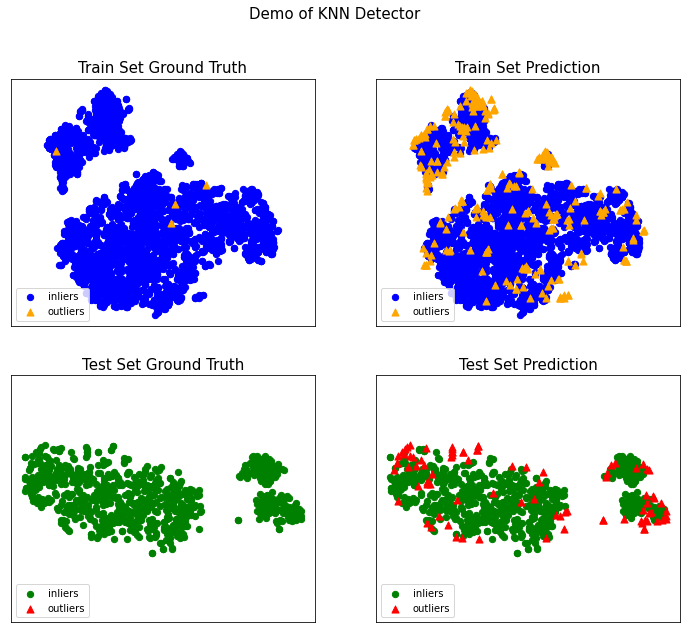

In [37]:
from pyod.utils.example import visualize
visualize('KNN', X_train_reduced_tsne, y_train, X_test_reduced_tsne, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

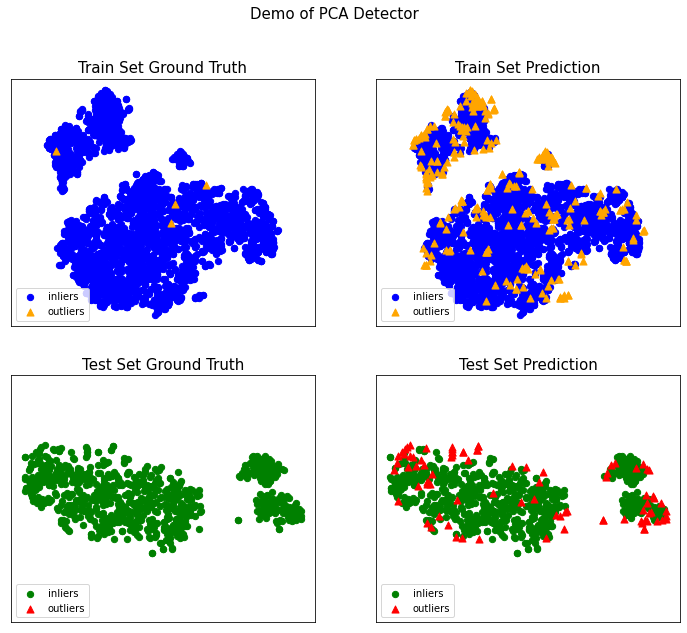

In [38]:
visualize('PCA', X_train_reduced_tsne, y_train, X_test_reduced_tsne, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

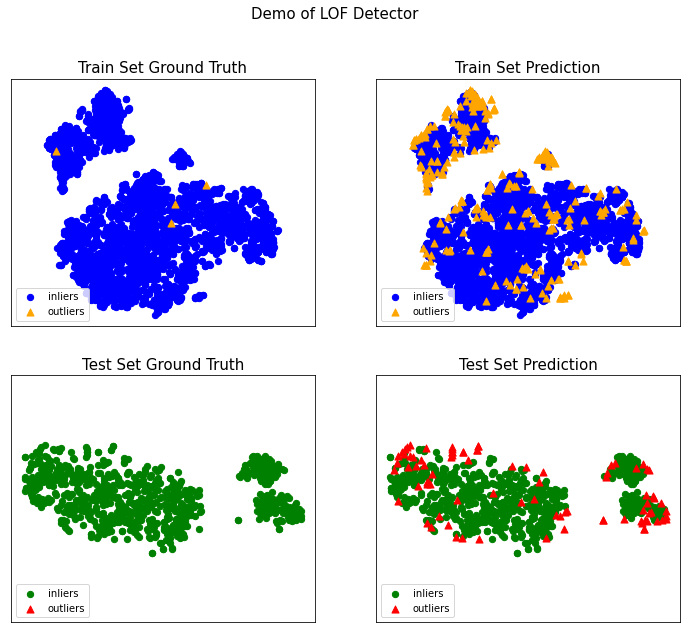

In [39]:
visualize('LOF', X_train_reduced_tsne, y_train, X_test_reduced_tsne, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

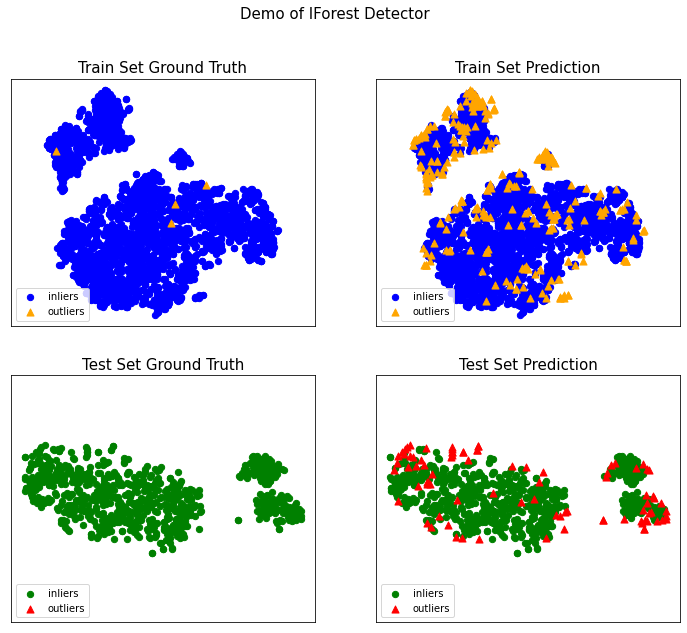